In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

# load the diabetes dataset
df=pd.read_csv('data.csv')
target_name="Y"
target=df[target_name]




In [2]:
stand = np.std(df)
newdf = (df - df.mean())/np.std(df)
for num in range(1, 9):
    sum = 0
    index = "X" + str(num)
    for i in newdf[index]:
        sum += i**2
    print(index, sum)

X1 38.0
X2 38.00000000000001
X3 38.00000000000002
X4 37.99999999999999
X5 38.0
X6 38.0
X7 38.00000000000001
X8 37.999999999999986


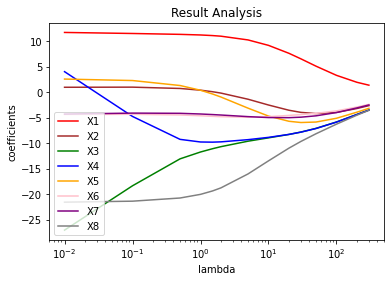

In [3]:
X=newdf[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
Y=df[['Y']]
lamb = [0.01, 0.1, 0.5, 1, 1.5, 2, 5, 10, 20, 30, 50, 100, 200, 300]
coefs = []
for i in range(8):
    coefs.append([])
ridge = linear_model.Ridge()
for a in lamb:    
    ridge.set_params(alpha=a)
    ridge.fit(X, Y)
    #print(ridge.coef_)
    for i in range(8):
        #print(coefs[i])
        coefs[i].append(ridge.coef_[0][i])
    
    #print(f"lambda:{coeff}  {ridge.coef_}\n")


#print(coefs)
colors = ['red', 'brown', 'green','blue','orange','pink', 'purple', 'grey']
ax = plt.gca()
plt.title('Result Analysis')
for i in range(8):
    ax.plot(lamb, coefs[i], color=colors[i], label='X' + str(i + 1))
    ax.set_xscale('log')

ax.legend() # 显示图例
plt.xlabel('lambda')
plt.ylabel('coefficients')

plt.show()

[1975.4147393421752, 1911.8556253792758, 1875.6041108186344, 1846.6497872435132, 1822.0550857775918, 1800.6218301872336, 1781.655688957033, 1764.688049352646, 1749.3774810214472, 1735.4639335184022, 1722.7434876332245, 1711.052838287125, 1700.2590527510456, 1690.2524717487888, 1680.9416123417282, 1672.249409104379, 1664.1103831088176, 1656.4684725249178, 1649.275345799272, 1642.4890734546254, 1636.0730706365218, 1629.995246876132, 1624.2273163613877, 1618.744233874168, 1613.5237300681138, 1608.5459259682714, 1603.7930111581222, 1599.24897354656, 1594.8993711970145, 1590.731138677304, 1586.732421910734, 1582.8924366908805, 1579.2013469473604, 1575.6501595789784, 1572.23063324916, 1568.9351990006417, 1565.7568909175795, 1562.6892853631125, 1559.7264475640568, 1556.8628845132034, 1554.0935033228332, 1551.4135742974902, 1548.8186981052638, 1546.3047765193041, 1543.867986278432, 1541.5047556803165, 1539.2117435749922, 1536.9858204723391, 1534.8240515158766, 1532.7236811082093, 1530.68211900

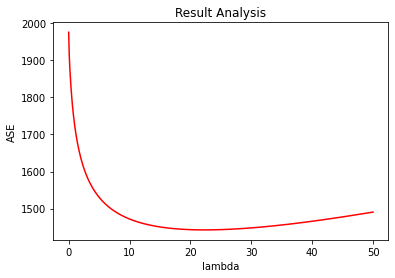

In [4]:
from sklearn.model_selection import train_test_split
import math
lmd=np.arange(0,50.1, 0.1)
#print(lmd)
bx = plt.gca()
plt.title('Result Analysis')
plt.xlabel('lambda')
plt.ylabel('ASE')

#x_matrix = np.column_stack((np.ones(len(x1))))

X=newdf[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
X=np.array(X)
Y=df['Y']
Y=np.array(Y)

ASEs = []
for lams in lmd:
    sum = 0
    Y_pre = []
    for i in range(38):
        #df2 = df.drop(labels=i, axis=0)
        X_test = X[i].reshape(1,-1)
        
        X1 = np.delete(X, i,axis= 0)
        Y1 = np.delete(Y, i,axis=0)

        ridge2 = linear_model.Ridge(alpha=lams, normalize = False)
        ridge2.fit(X1, Y1)
        y_pre = ridge2.predict(X_test)
        Y_pre.append(y_pre[0])
        sum += math.pow(y_pre[0] - Y[i], 2)
    ASE = sum / 38
    ASEs.append(ASE)

print(ASEs)
bx.plot(lmd, ASEs, color='red')
plt.show()